<a href="https://colab.research.google.com/github/keinerfan/CIAP1/blob/CODES/morgan_KNN_hyperTunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv")
data.fillna(data.mean(), inplace=True)

y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )

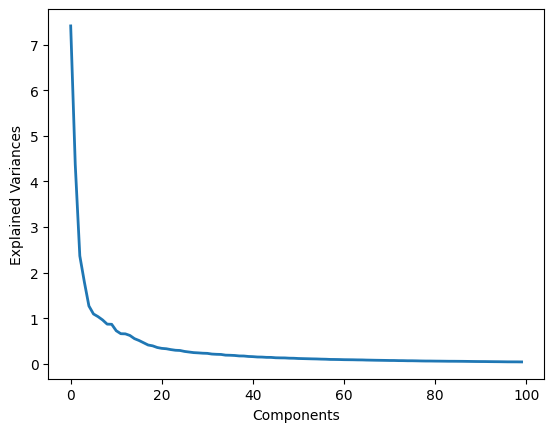

In [3]:

pca = PCA(n_components=100).fit(data)
plot(pca.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [4]:
pca = PCA(n_components= 75)
pca.fit(data)
merged_data  = pca.transform(data)

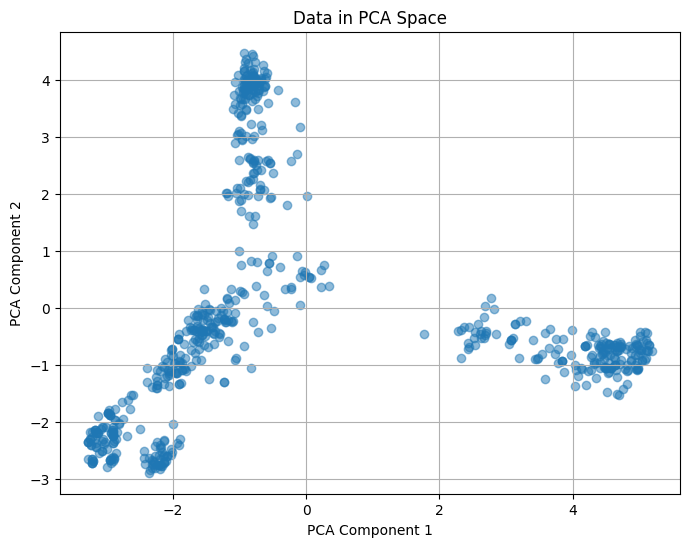

In [5]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

# **hyper tunning svr**

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


yc = y

# Define pipeline with SVR
pipeline = KNeighborsRegressor()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Define hyperparameter grid
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=2, we

Best parameters found:  {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
SVR Train Set Metrics:
Mean Squared Error: 0.008534097636382335
R2 Score: 0.9951580747742648


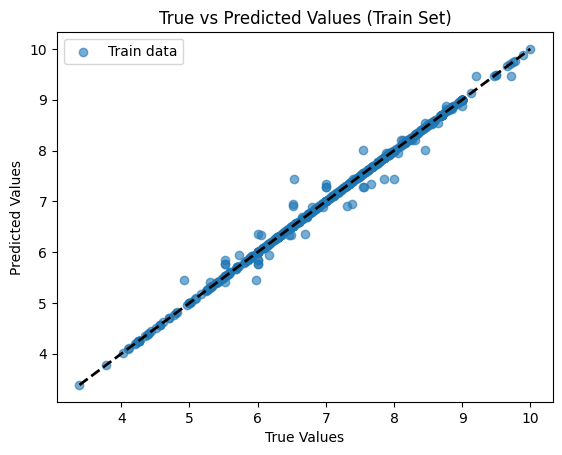


SVR Test Set Metrics:
Mean Squared Error: 0.4222169692383143
R2 Score: 0.7259352312210184


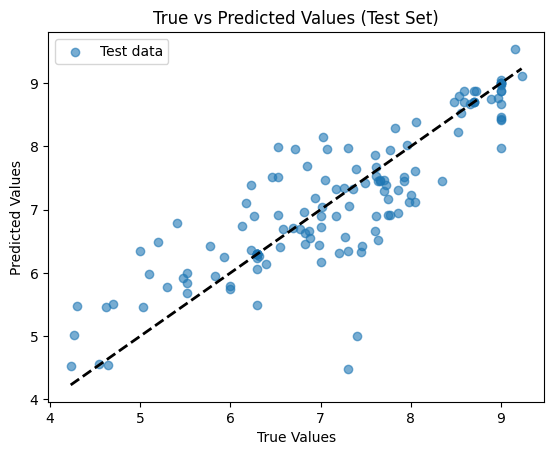

In [7]:

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, predicted_labels_train)
r2_train = r2_score(y_train, predicted_labels_train)
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("SVR Train Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

# Plot true vs. predicted values for training set
plt.figure()
plt.scatter(y_train, predicted_labels_train, label='Train data', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Train Set)')
plt.legend()
plt.show()

# Predictions and metrics for test set
predicted_labels_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_labels_test)
r2_test = r2_score(y_test, predicted_labels_test)

print("\nSVR Test Set Metrics:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

# Plot true vs. predicted values for test set
plt.figure()
plt.scatter(y_test, predicted_labels_test, label='Test data', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# **internal KFOLD cross validation with 5 folds**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the SVR model
model = SVR(kernel='rbf', C=1, epsilon=0.2, gamma='scale')

# Number of splits for KFold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize lists to store evaluation metrics for each fold
metrics = {
    'Fold': [],
    'Train R2': [],
    'Train MSE': [],
    'Train MAE': [],
    'Train MAPE': [],
    'Test R2': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test MAPE': []
}

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data[train_index], merged_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for this fold
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics for this fold to the metrics dictionary
    metrics['Fold'].append(fold)
    metrics['Train R2'].append(train_r2)
    metrics['Train MSE'].append(train_mse)
    metrics['Train MAE'].append(train_mae)
    metrics['Train MAPE'].append(train_mape)
    metrics['Test R2'].append(test_r2)
    metrics['Test MSE'].append(test_mse)
    metrics['Test MAE'].append(test_mae)
    metrics['Test MAPE'].append(test_mape)

    # Print metrics for training set
    print(f"======== Fold {fold} ======")
    print("Training Set Metrics:")
    print(f'R-Squared: {train_r2}')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

    # Print metrics for testing set
    print("\nTesting Set Metrics:")
    print(f'R-Squared: {test_r2}')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

# Calculate averages for each metric
average_metrics = {
    'Fold': ['Average'],
    'Train R2': [np.mean(metrics['Train R2'])],
    'Train MSE': [np.mean(metrics['Train MSE'])],
    'Train MAE': [np.mean(metrics['Train MAE'])],
    'Train MAPE': [np.mean(metrics['Train MAPE'])],
    'Test R2': [np.mean(metrics['Test R2'])],
    'Test MSE': [np.mean(metrics['Test MSE'])],
    'Test MAE': [np.mean(metrics['Test MAE'])],
    'Test MAPE': [np.mean(metrics['Test MAPE'])]
}

# Append average metrics to the metrics dictionary
for key in metrics.keys():
    metrics[key].append(average_metrics[key][0])

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Export the DataFrame to a CSV file
metrics_df.to_csv('KNN_k_fold_metrics.csv', index=False)

print("\nMetrics and averages have been saved to 'k_fold_metrics.csv'")
metrics_df


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 1 ======
Training Set Metrics:
R-Squared: 0.8822845816704745
Mean Squared Error (MSE): 0.2074783947493129
Mean Absolute Error (MAE): 0.3032519060046487
Mean Absolute Percentage Error (MAPE): 21.40102972331697

Testing Set Metrics:
R-Squared: 0.7791914720293647
Mean Squared Error (MSE): 0.34017180638391153
Mean Absolute Error (MAE): 0.42669567922808704
Mean Absolute Percentage Error (MAPE): 19.071044979537813
======== Fold 2 ======
Training Set Metrics:
R-Squared: 0.9028050136351748
Mean Squared Error (MSE): 0.16752636273503846
Mean Absolute Error (MAE): 0.29095005188355255
Mean Absolute Percentage Error (MAPE): 20.947146517860475

Testing Set Metrics:
R-Squared: 0.7194028473479506
Mean Squared Error (MSE): 0.4660915698000932
Mean Absolute Error (MAE): 0.46623662617086176
Mean Absolute Percentage Error (MAPE): 21.490123037690896
======== Fold 3 ======
Training Set Metrics:
R-Squared: 0.8888642814976581
Mean Squared Error (MSE): 0.18775225677496188
Mean Absolute Error (MAE)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 4 ======
Training Set Metrics:
R-Squared: 0.8755769652770452
Mean Squared Error (MSE): 0.21669662992667602
Mean Absolute Error (MAE): 0.3148207683708434
Mean Absolute Percentage Error (MAPE): 21.259276463858797

Testing Set Metrics:
R-Squared: 0.8331482308899049
Mean Squared Error (MSE): 0.26442656264692443
Mean Absolute Error (MAE): 0.3554032788773138
Mean Absolute Percentage Error (MAPE): 19.232184963919742
======== Fold 5 ======
Training Set Metrics:
R-Squared: 0.8752100595540802
Mean Squared Error (MSE): 0.2082600477956349
Mean Absolute Error (MAE): 0.3062790677252899
Mean Absolute Percentage Error (MAPE): 20.588677621205363

Testing Set Metrics:
R-Squared: 0.8499203768059105
Mean Squared Error (MSE): 0.2868914971190999
Mean Absolute Error (MAE): 0.41243371837543746
Mean Absolute Percentage Error (MAPE): 21.558731054952005

Metrics and averages have been saved to 'k_fold_metrics.csv'


,Fold,Train R2,Train MSE,Train MAE,Train MAPE,Test R2,Test MSE,Test MAE,Test MAPE
0,1,0.882285,0.207478,0.303252,21.401030,0.779191,0.340172,0.426696,19.071045
1,2,0.902805,0.167526,0.290950,20.947147,0.719403,0.466092,0.466237,21.490123
2,3,0.888864,0.187752,0.296723,20.860734,0.788768,0.385489,0.421461,21.972763
3,4,0.875577,0.216697,0.314821,21.259276,0.833148,0.264427,0.355403,19.232185
4,5,0.875210,0.208260,0.306279,20.588678,0.849920,0.286891,0.412434,21.558731
5,Average,0.884948,0.197543,0.302405,21.011373,0.794086,0.348614,0.416446,20.664969


# **Saving the model **